In [56]:
from os import walk
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
from scipy import constants

In [62]:
mu_0 = constants.mu_0
N = 80
r = 0.09
R = 1.682
calc_B = lambda U : U * mu_0 * (4/5) ** (3/2) * N/(r * R)

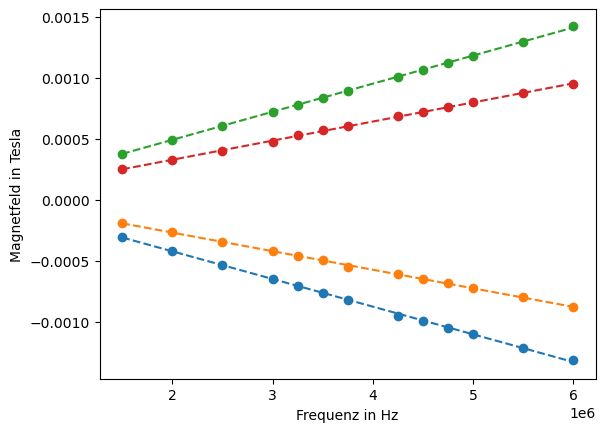

In [89]:
path = '../data/Magnetfeldvariation'
filenames = next(walk(path))[2]
b1 = []
b2 = []
b3 = []
b4 = []
f = []
for i, filename in enumerate(filenames):
    freq = float(filename.replace(',', '.'))
    data = np.loadtxt(path + '/' + filename)
    #fig, ax1 = plt.subplots()
    #ax2 = ax1.twinx()

    first = 0
    last  = -1
    if freq >= 5000:
        first = 90
        last = -90


    transmission = data[first:last, 2]
    time = data[first:last, 0]
    magnetic_field = data[first:last, 1] / 10

    #ax1.set_title('Frequenz: ' + filename + 'kHz')

    #ax1.plot(time, magnetic_field)
    #ax2.plot(time, transmission, c='r')

    lowest_transmisstion_peaks, _ = find_peaks(-transmission, distance= 200)
    lowest_5_transmission_peaks = lowest_transmisstion_peaks[(transmission[lowest_transmisstion_peaks]).argsort()[:5]]


    f.append(float(filename.replace(',', '.')) * 1000) # khz
    #ax2.scatter(time[lowest_5_transmission_peaks], transmission[lowest_5_transmission_peaks])
    lowest_5_transmission_peaks.sort()

    b1.append(calc_B(magnetic_field[lowest_5_transmission_peaks[0]]))
    b2.append(calc_B(magnetic_field[lowest_5_transmission_peaks[1]]))
    b3.append(calc_B(magnetic_field[lowest_5_transmission_peaks[-1]]))
    b4.append(calc_B(magnetic_field[lowest_5_transmission_peaks[-2]]))

fig, ax = plt.subplots()
ax.set(xlabel='Frequenz in Hz', ylabel='Magnetfeld in Tesla')
slope1, intercept1, r1, p1, std_err1 = stats.linregress(f, b1)
ax.plot(f, slope1 * np.array(f) + intercept1, '--')
ax.scatter(f, b1)

slope2, intercept2, r2, p2, std_err2 = stats.linregress(f, b2)
ax.plot(f, slope2 * np.array(f) + intercept2, '--')
ax.scatter(f, b2)

slope3, intercept3, r3, p3, std_err3 = stats.linregress(f, b3)
ax.plot(f, slope3 * np.array(f) + intercept3, '--')
ax.scatter(f, b3)

slope4, intercept4, r4, p4, std_err4 = stats.linregress(f, b4)
ax.plot(f, slope4 * np.array(f) + intercept4, '--')
ax.scatter(f, b4)

In [90]:
slopes = [slope1, slope2, slope3, slope4]
print(slopes)

[-2.265800504996159e-10, -1.5201066176459684e-10, 2.2998315038623184e-10, 1.564429918608235e-10]


In [91]:
mu_b, _, _ = constants.physical_constants['Bohr magneton']
gf = lambda a : constants.h / (mu_b * a)

In [94]:
print(gf(np.array(slopes)))

[-0.31533109 -0.47001792  0.31066509  0.45670141]
